In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Oscilador Torsional/Torque Mecánico - Oscilador Torsional.xlsx"
data = pd.read_excel(data)
print(data)

   Posición equilibrio TP(Radianes)  Masa 1  TP(mg)  Masa 2 TP(mg)  \
0                              3.02              50             50   
1                              3.36             100            100   
2                              3.55             150            150   
3                              3.66             200            200   
4                              3.78             250            250   
5                              3.88             300            300   

   Incertidumbre Posición Equilibrio TP(Radianes)  \
0                                            0.01   
1                                            0.01   
2                                            0.01   
3                                            0.01   
4                                            0.01   
5                                            0.01   

   Posición equilibrio TN(Radianes)  Masa 1  TN(mg)  Masa 2 TN(mg)  \
0                              2.84              50             50 

In [153]:
x1,y1=np.array(data['Posición equilibrio TP(Radianes)'])-3.004, (np.array(data['Masa 1  TP(mg)']+ np.array(data['Masa 2 TP(mg)'])))/1000
x1,y1

(array([0.016, 0.356, 0.546, 0.656, 0.776, 0.876]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]))

In [154]:
g_Bog=9.8
Radio=1.2/100
Torque=y1*Radio*g_Bog


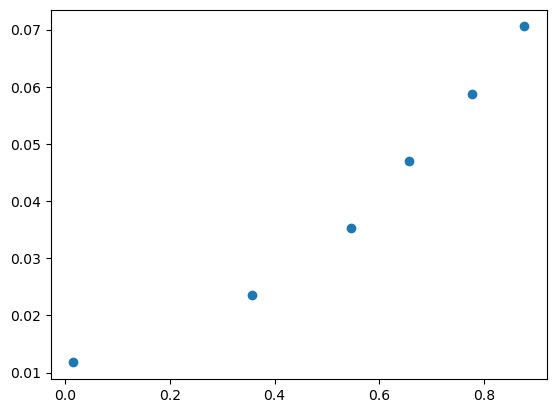

In [155]:
plt.scatter(x1, Torque)

In [156]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*t+b,  x1,Torque)
incert =np.sqrt(np.diag(cov))

In [157]:
param, incert

(array([0.06797295, 0.00461321]), array([0.00886017, 0.00539549]))

In [158]:
X=np.linspace(x1[0], x1[-1], 1000)
Y=param[0]*X+param[1]

Text(0.5, 1.0, 'Regresión Lineal-Torque Positivo-Desplazamiento (rad) vs. Torque (N*m)')

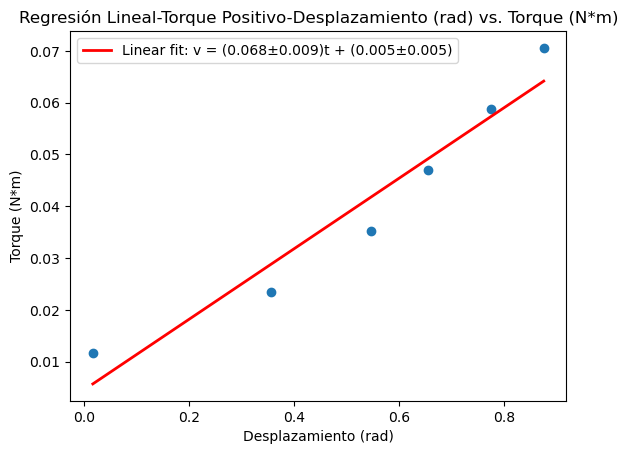

In [159]:
fig, ax = plt.subplots()
ax.scatter(x1, Torque)
ax.plot(X, Y, color='red', linewidth=2, 
        label=f'Linear fit: v = ({np.round(param[0], 3)}±{np.round(incert[0],3)})t + ({np.round(param[1],3)}±{np.round(incert[1],3)})')
#plt.legend(['Regresión Lineal: Intercepto '])
ax.legend(loc='upper left')
ax.set_xlabel('Desplazamiento (rad)')
ax.set_ylabel('Torque (N*m)')
ax.set_title('Regresión Lineal-Torque Positivo-Desplazamiento (rad) vs. Torque (N*m)')

In [160]:
x2,y2=np.array(data['Posición equilibrio TN(Radianes)'])-3.004, (np.array(data['Masa 1  TN(mg)']+ np.array(data['Masa 2 TN(mg)'])))/1000
x2,y2

(array([-0.164, -0.364, -0.504, -0.644, -0.764, -0.884]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]))

In [161]:
g_Bog=9.8
Radio=1.2/100
Torque2=y2*Radio*g_Bog

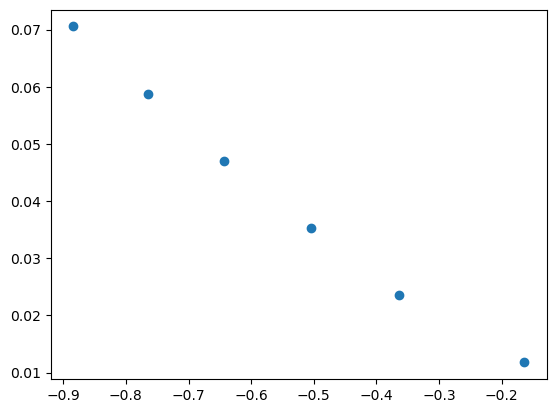

In [162]:
plt.scatter(x2, Torque2)

In [163]:
param2, cov2= scipy.optimize.curve_fit(lambda t,a,b: a*t+b,  x2,Torque2)
incert2 =np.sqrt(np.diag(cov2))

In [164]:
param2, incert2

(array([-0.08256737, -0.00458232]), array([0.00394111, 0.00238282]))

In [165]:
X2=np.linspace(x2[0], x2[-1], 1000)
Y2=param2[0]*X2+param2[1]

Text(0.5, 1.0, 'Regresión Lineal-Torque Negativo-Desplazamiento (rad) vs. Torque (N*m)')

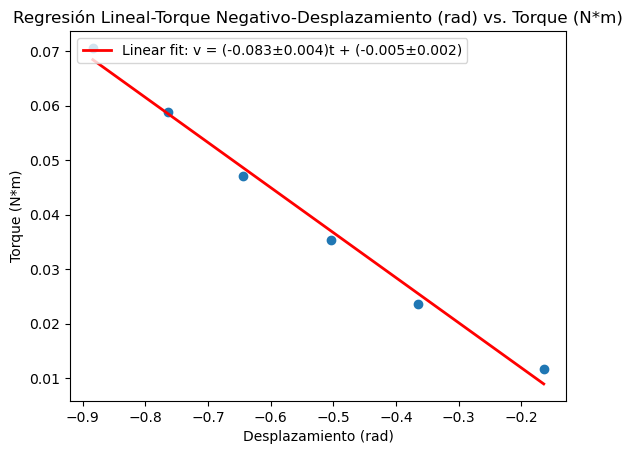

In [166]:
fig1, ax1 = plt.subplots()
ax1.scatter(x2, Torque2)
ax1.plot(X2, Y2, color='red', linewidth=2, 
        label=f'Linear fit: v = ({np.round(param2[0], 3)}±{np.round(incert2[0],3)})t + ({np.round(param2[1],3)}±{np.round(incert2[1],3)})')
#plt.legend(['Regresión Lineal: Intercepto '])
ax1.legend(loc='upper left')
ax1.set_xlabel('Desplazamiento (rad)')
ax1.set_ylabel('Torque (N*m)')
ax1.set_title('Regresión Lineal-Torque Negativo-Desplazamiento (rad) vs. Torque (N*m)')